In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
plt.style.use("ggplot")
%matplotlib inline

In [53]:
# import tensorflow modules. tensorflow was run on a docker container

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall

# tf.config.threading.set_intra_op_parallelism_threads(12)

In [54]:
## import sklearn modules

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [55]:
orbit = pd.read_csv('../data/samples_2_bodies_3_dim_1_m_com.csv')

In [56]:
orbit

,sim_id,m_1,m_2,rx_1_0,ry_1_0,rz_1_0,rx_2_0,ry_2_0,rz_2_0,vx_1_0,...,rz_1_1000,rx_2_1000,ry_2_1000,rz_2_1000,vx_1_1000,vy_1_1000,vz_1_1000,vx_2_1000,vy_2_1000,vz_2_1000
0,0.0,1.0,1.0,0.072812,0.339681,0.234807,-0.072812,-0.339681,-0.234807,0.032668,...,0.245414,-0.062839,-0.156803,-0.245414,-0.104210,-0.721673,-0.262195,0.104210,0.721673,0.262195
1,0.0,1.0,1.0,0.054407,0.105241,0.222055,-0.054407,-0.105241,-0.222055,-0.151459,...,0.001457,-0.017101,-0.250963,-0.001457,0.167632,0.763737,0.546329,-0.167632,-0.763737,-0.546329
2,0.0,1.0,1.0,0.015466,-0.034834,0.083430,-0.015466,0.034834,-0.083430,-0.452646,...,0.080874,-0.039404,-0.331130,-0.080874,0.128510,0.343728,0.494653,-0.128510,-0.343728,-0.494653
3,0.0,1.0,1.0,0.060140,0.364899,0.167492,-0.060140,-0.364899,-0.167492,0.083064,...,0.261195,-0.074577,-0.281935,-0.261195,-0.013481,-0.439943,0.074785,0.013481,0.439943,-0.074785
4,0.0,1.0,1.0,0.017181,0.251330,0.001720,-0.017181,-0.251330,-0.001720,0.167503,...,0.181902,-0.063202,-0.364724,-0.181902,0.074315,-0.030131,0.357845,-0.074315,0.030131,-0.357845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1999.0,1.0,1.0,-0.056611,0.192364,-0.247187,0.056611,-0.192364,0.247187,-0.214536,...,-0.125396,0.077384,-0.004295,0.125396,0.130841,-1.165302,1.163385,-0.130841,1.165302,-1.163385
199996,1999.0,1.0,1.0,-0.062381,-0.046865,-0.059740,0.062381,0.046865,0.059740,0.604474,...,0.126458,-0.132333,-0.099748,-0.126458,0.632941,1.154271,0.048515,-0.632941,-1.154271,-0.048515
199997,1999.0,1.0,1.0,0.250455,0.441298,0.031888,-0.250455,-0.441298,-0.031888,0.071420,...,-0.021397,-0.256480,-0.517709,0.021397,-0.002030,0.345303,-0.286874,0.002030,-0.345303,0.286874
199998,1999.0,1.0,1.0,0.117538,0.560847,-0.275648,-0.117538,-0.560847,0.275648,-0.211689,...,-0.294678,-0.076410,-0.505170,0.294678,-0.231047,-0.354711,-0.072457,0.231047,0.354711,0.072457


In [57]:
X_cols = []
for col in orbit.columns:
    if "m" == col[0] or "_0" in col:
        X_cols.append(col)

model_step = 10
check = '_' + str(model_step)
y_cols = []
for col in orbit.columns:
    if check == col[-len(check):]:
        y_cols.append(col)

X_cols, y_cols

(['m_1',
  'm_2',
  'rx_1_0',
  'ry_1_0',
  'rz_1_0',
  'rx_2_0',
  'ry_2_0',
  'rz_2_0',
  'vx_1_0',
  'vy_1_0',
  'vz_1_0',
  'vx_2_0',
  'vy_2_0',
  'vz_2_0'],
 ['rx_1_10',
  'ry_1_10',
  'rz_1_10',
  'rx_2_10',
  'ry_2_10',
  'rz_2_10',
  'vx_1_10',
  'vy_1_10',
  'vz_1_10',
  'vx_2_10',
  'vy_2_10',
  'vz_2_10'])

In [58]:
X = orbit[X_cols].values
y = orbit[y_cols].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
# scaler_train = StandardScaler()
# X_train = scaler_train.fit_transform(X_train, y_train)

In [78]:
# create and compile neural network

n_samples, n_feats = X_train.shape
_, n_outputs = y_train.shape

model = Sequential()

hidden_units = n_feats
epochs=100
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

scale = 3


hidden_layer = Dense(units=hidden_units,
                input_dim=n_feats,
                kernel_initializer='uniform',
                activation='relu')

hidden_layer2 = Dense(units=hidden_units*scale,
                input_dim=hidden_units,
                kernel_initializer='uniform',
                activation='relu')

hidden_layer3 = Dense(units=hidden_units*scale,
                input_dim=hidden_units*scale,
                kernel_initializer='uniform',
                activation='relu')

hidden_layer4 = Dense(units=n_outputs,
                input_dim=hidden_units*scale,
                kernel_initializer='uniform',
                activation='relu')

output_layer = Dense(units=n_outputs,
                input_dim=hidden_units,
                kernel_initializer='uniform',
                activation='linear')

model.add(hidden_layer)
# model.add(Dropout(rate=0.1))
# model.add(hidden_layer2)
# model.add(Dropout(rate=0.1))
# model.add(hidden_layer3)
# model.add(Dropout(rate=0.1))
# model.add(hidden_layer3)
# model.add(Dropout(rate=0.1))
# model.add(hidden_layer3)
# model.add(Dropout(rate=0.1))
# model.add(hidden_layer3)
# model.add(Dropout(rate=0.1))
# model.add(hidden_layer3)
# model.add(Dropout(rate=0.1))
# model.add(hidden_layer3)
# model.add(Dropout(rate=0.1))
# model.add(hidden_layer4)
# model.add(Dropout(rate=0.1))
model.add(output_layer)
model.add(Dropout(rate=0.1))

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# sgd = SGD(lr=learning_rate)
model.compile(loss='mean_squared_error', 
              optimizer=sgd)

history = model.fit(X_train, y_train, 
          epochs=epochs, 
          batch_size=5000, 
          verbose=2, 
          validation_split=0.2)

Train on 120000 samples, validate on 30000 samples
Epoch 1/100
120000/120000 - 0s - loss: 1.7207 - val_loss: 0.2483
Epoch 2/100
120000/120000 - 0s - loss: 0.4022 - val_loss: 0.1193
Epoch 3/100
120000/120000 - 0s - loss: 0.3828 - val_loss: 0.1168
Epoch 4/100
120000/120000 - 0s - loss: 0.3804 - val_loss: 0.1155
Epoch 5/100
120000/120000 - 0s - loss: 0.3864 - val_loss: 0.1144
Epoch 6/100
120000/120000 - 0s - loss: 0.3829 - val_loss: 0.1140
Epoch 7/100
120000/120000 - 0s - loss: 0.3846 - val_loss: 0.1130
Epoch 8/100
120000/120000 - 0s - loss: 0.3808 - val_loss: 0.1119
Epoch 9/100
120000/120000 - 0s - loss: 0.3823 - val_loss: 0.1104
Epoch 10/100
120000/120000 - 0s - loss: 0.3789 - val_loss: 0.1084
Epoch 11/100
120000/120000 - 0s - loss: 0.3788 - val_loss: 0.1056
Epoch 12/100
120000/120000 - 0s - loss: 0.3652 - val_loss: 0.1026
Epoch 13/100
120000/120000 - 0s - loss: 0.3642 - val_loss: 0.0991
Epoch 14/100
120000/120000 - 0s - loss: 0.3629 - val_loss: 0.0957
Epoch 15/100
120000/120000 - 0s - 

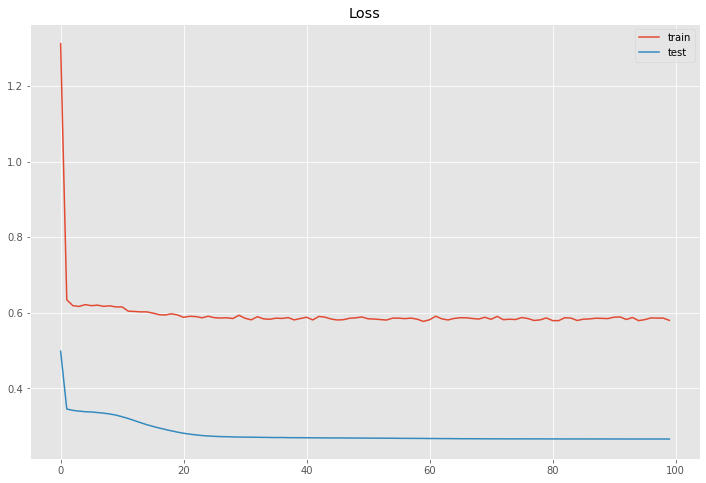

In [79]:
# figure of loss over time

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Loss')
ax.plot(np.sqrt(history.history['loss']), label='train')
ax.plot(np.sqrt(history.history['val_loss']), label='test')
ax.legend();

In [91]:
y_test[0], model.predict(X_test[0].reshape((1,-1)))

(array([ 0.2520766 , -0.33554137,  0.04001771, -0.2520766 ,  0.33554137,
        -0.04001771, -0.20406883, -0.40145374, -0.55924663,  0.20406883,
         0.40145374,  0.55924663]),
 array([[ 0.2577567 , -0.32283178,  0.03679295, -0.2583753 ,  0.32512748,
         -0.03565319, -0.12777857, -0.32154882, -0.4054281 ,  0.12817313,
          0.3213558 ,  0.40461776]], dtype=float32))